# Data Wrangling, EDA, and Visualization (66 points)

We are going to investigate the TaFeng Transactions to another level.

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy, Datascience, pandas modules.
import numpy as np
import pandas as pd
import seaborn as sns

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Importing Data
Please copy necessary codes from workshop 3 to import the three tables and conduct the same LEFT join to get the tafeng_full dataframe.

In [2]:
# age_class
age_class_columns = ['code', 'age_range']
age_classes = pd.read_csv('age_classes.txt', sep=' ',#replace ... with your code (1 point)  
                          header=None, names=age_class_columns)
age_classes['age_range'] = age_classes['age_range'].astype('category', ordered=True)
age_classes[['age_min', 'age_max']] = (
    age_classes['age_range']
    .str.split("-", expand=True)
    .astype('int')
)
age_classes['age_center'] = (age_classes['age_max'] + age_classes['age_min']) / 2.

# residence_areas
residence_areas = pd.read_csv('residence_area.txt', 
                              delimiter=':',
                              header=None, 
                              names=['code','area'])
residence_areas['area'] = residence_areas['area'].str.strip()

# tafeng transactions
tafeng_transactions = pd.read_csv('TaFengTransactions.txt', delimiter=';')
tafeng_transactions['age_code'] = tafeng_transactions['age_code'].str.strip()
tafeng_transactions['residence_area'] = tafeng_transactions['residence_area'].str.strip()

# joins
tafeng_full = pd.merge(tafeng_transactions, age_classes,
                      how='left', left_on='age_code', right_on='code')
tafeng_full = tafeng_full.drop('code', axis=1)
tafeng_full = pd.merge(tafeng_full, residence_areas, 
                      how='left', left_on = 'residence_area', right_on = 'code') 
tafeng_full = tafeng_full.drop('code', axis=1)

time_format = "%Y-%m-%d %H:%M:%S"
tafeng_full['transaction_time'] = pd.to_datetime(tafeng_full['transaction_time'], 
                                                format = time_format)
tafeng_full.head() # output 1 point

,entry_date,transaction_time,customer_id,age_code,residence_area,product_subclass,product_id,amount,asset,sales_price,age_range,age_min,age_max,age_center,area
0,2016-12-26,2001-01-15,1786439,G,H,110109,4710043552065,1,144,190,50-54,50.0,54.0,52.0,unknown
1,2016-12-26,2001-01-15,98946,E,E,100312,4710543111014,1,32,38,40-44,40.0,44.0,42.0,115
2,2016-12-26,2001-01-15,905602,D,E,500206,4710114322115,1,64,79,35-39,35.0,39.0,37.0,115
3,2016-12-26,2001-01-15,1964295,E,E,530106,4713813010123,1,174,147,40-44,40.0,44.0,42.0,115
4,2016-12-26,2001-01-15,2146553,B,D,100217,8801019421013,1,47,52,25-29,25.0,29.0,27.0,114


# Question 1 (24 points)
Create a data frame called "carts" that contains the three variables above, as well as "customer_id" and "transaction_time". Make sure you use the names specified. (8 points)

In [3]:
# type your code here
transactions = tafeng_full.groupby(['customer_id', 'transaction_time'])
carts = pd.DataFrame()
carts['num_items'] = transactions['amount'].sum()
carts['total_value'] = transactions['sales_price'].sum()
carts['num_unique'] = transactions['amount'].count()
carts # output 1 point

num_items  total_value  num_unique
customer_id transaction_time                                    
0           2000-11-29                1           85           1
            2000-12-02                4          396           1
            2000-12-23                1           36           1
            2001-01-03                3          207           1
            2001-01-09                1          155           1
10801       2001-01-22                1           38           1
16049       2000-11-07                1           65           1
18173       2001-01-20                1           43           1
20220       2000-11-10                1           25           1
            2000-12-08                2          138           1
            2000-12-23                1          149           1
21128       2001-01-21                1           20           1
21449       2001-01-07                1           92           1
21821       2000-12-03                1          175           1
21951       2001-01-02                3           15           1
22149       2000-12-09                1           79           1
22729       2001-01-14                1           59           1
22927       2001-01-22                1          119           1
23078       2000-11-19                1          165           1
23207       2000-12-19                1           52           1
23795       2001-01-23                1            6           1
23917       2000-12-11                1          299           1
25362       2000-11-04                1          118           1
25683       2000-11-17                1           61           1
            2000-11-24                1           48           1
25805       2001-01-22                2           48           1
26550       2000-11-02                1           75           1
27199       2000-11-16                2          164           1
27335       2001-01-14                1           40           1
27632       2000-12-15                5          207           3
...                                 ...          ...         ...
2166285     2001-01-14                1           48           1
2166896     2001-01-21                5          175           1
2167695     2000-12-27                1           38           1
2167961     2000-12-28                1           45           1
2167992     2000-12-30                3          483           2
            2001-01-01                1           99           1
2168067     2000-12-31                1          299           1
2168272     2000-12-30                1           12           1
2168302     2000-12-30                1           48           1
2168647     2001-01-01                1           28           1
2168746     2001-01-01                1           25           1
2168807     2001-01-01                3          384           1
2168883     2001-01-01                1           58           1
2168951     2001-01-11                2           53           2
2169866     2001-01-21                3           87           1
2170268     2001-01-08                2          333           2
2171654     2001-01-14                1           35           1
2171685     2001-01-14                1          178           1
2171777     2001-01-15                1           79           1
2171883     2001-01-16                1          102           1
2172231     2001-01-31                1          350           1
2172248     2001-01-18                3          597           1
2172347     2001-01-27                1           95           1
2172569     2001-01-20                1          155           1
2172712     2001-01-22                2          127           2
2172941     2001-01-22                2          178           1
2173061     2001-01-22                1          207           1
2173436     2001-01-27                9          378           1
2173634     2001-01-28                1           35           1


Now let's take a look at the relationship between the number of items in a cart and the cart's total value. Intuitively the two should be positively correlated. Make a SCATTER plot that will help us inspect the relationship between these two variables. (6 points) 

Text(0.5,1,'Quantity Purchased vs Value')

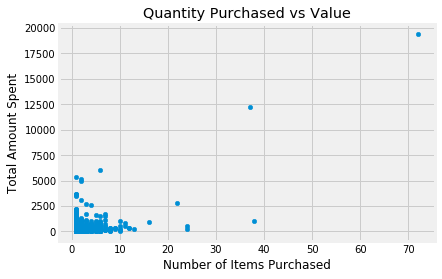

In [4]:
# type your code here
carts.plot(kind='scatter', x='num_items', y='total_value')
plt.xlabel('Number of Items Purchased')
plt.ylabel('Total Amount Spent')
plt.title('Quantity Purchased vs Value')
# plot output 1 point

We might expect from the distribution of the number of trips that there would be a few very large values for the number of items and the total amount spent. Indeed, a handful of observations make it difficult to see the shape of the bulk of the data. Take a log transformation of these two variables. Make another scatter plot, but this time, log-transform both the x and y axes. (2 points)

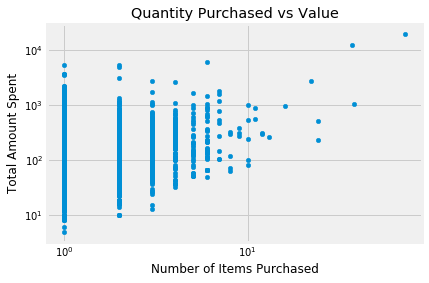

In [5]:
# type your code here
carts.plot(kind='scatter', x='num_items', y='total_value')
plt.title('Quantity Purchased vs Value')
plt.xlabel('Number of Items Purchased')
plt.ylabel('Total Amount Spent')
plt.xscale('log')
plt.yscale('log')
# plot output 1 point

Please study the functionality of seaborn's lmplot and use it to simultaneously plot the points and the line-of-best-fit for the log-log data. (2 points)

Text(10.05,0.5,'Total Amount Spent')

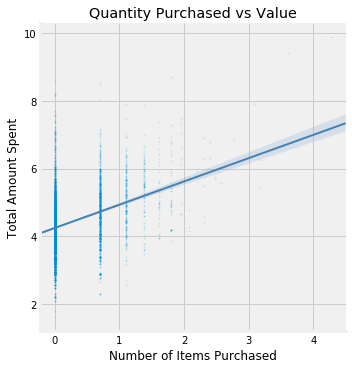

In [6]:
# type your code here
x = np.log(carts['num_items'])
y = np.log(carts['total_value'])
df = pd.DataFrame({'x':x, 'y':y})
sns.lmplot('x', 'y', data=df, 
           scatter_kws={'s': 1, 'alpha': 0.1}, 
           line_kws={'lw': 2, 'color': '#4682b4'})
plt.title('Quantity Purchased vs Value')
plt.xlabel('Number of Items Purchased')
plt.ylabel('Total Amount Spent')
# plot output 1 point

# Self-Directed EDA
This last two questions are intentionally more open-ended and will be graded on the completeness of the plot(s) produced and the insights you gain from them. Be sure to consider NECESSARY transformations, subsets, correlations, reference markers, and lines/curves-of-best-fit to reveal the relationship that you are wanting to learn more about. Also be sure to make plots that are appropriate for the variable types. For completeness, be explicit about any assumptions you make in your analysis.

# Question 2 (14 points)
Make a visualization of and interpret the age distribution of the shoppers. (10 points)

In [7]:
#Please check my comments

# Question 3 (26 points)
Make a visualization of and interpret the relationship between amount spent on a shopping trip and the customer's age. (20 points)

In [8]:
#Please check my comments